In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from itertools import chain

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [11]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe912612cd0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe9126342e0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data.
# Calculate the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [16]:
# Calculate the date 1 year ago from the last data point in the database
first_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(first_date)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").order_by(Measurement.date).all()
year_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:
# Perform a query to retrieve the data and precipitation scores
year_prcp_df = pd.DataFrame(data=year_prcp).set_index('date')
year_prcp_df = year_prcp_df.rename(columns={'prcp': 'precipitation'})
year_prcp_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [19]:
# Sort the dataframe by date
df = year_prcp_df.sort_values('date')
df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


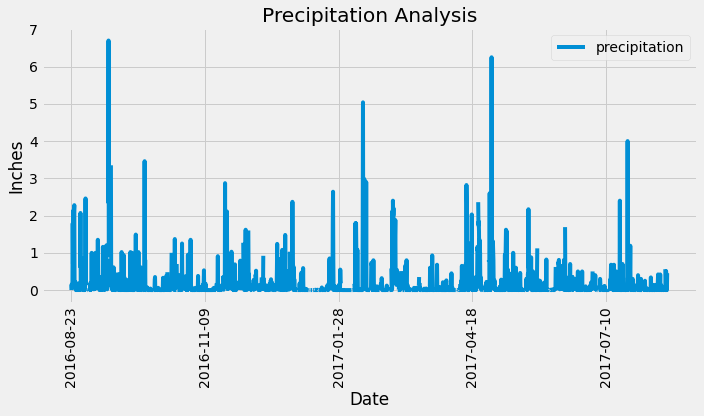

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (10,6))
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(Station).filter(Station.id).count()
print(number_stations ,"stations are available in this dataset.")

9 stations are available in this dataset.


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
activest_station = stations[0][0]
print("The most active station is ",activest_station,".")

The most active station is  USC00519281 .


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print("The lowest temperature recorded for station 'USC00519281' is ",lowest_temperature)
print("The highest temperature recorded for station 'USC00519281' is ",highest_temperature)
print("The average temperature recorded for station 'USC00519281' is ",average_temperature)

The lowest temperature recorded for station 'USC00519281' is  [(54.0,)]
The highest temperature recorded for station 'USC00519281' is  [(85.0,)]
The average temperature recorded for station 'USC00519281' is  [(71.66378066378067,)]


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
last_year_tem = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()
last_year_tem

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column
station_df = pd.DataFrame(data=last_year_tem).set_index('date')
station_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


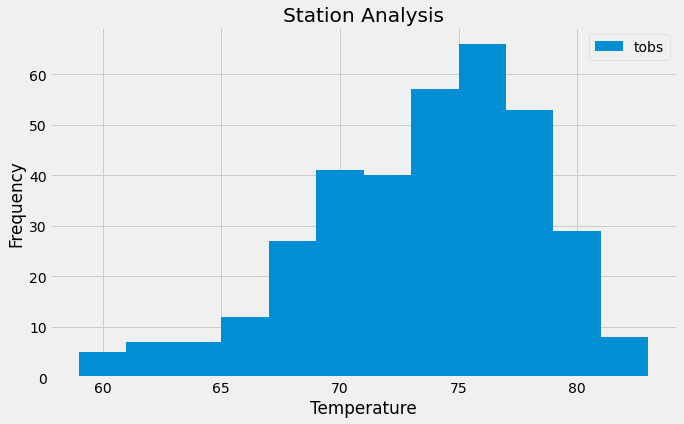

In [28]:
# plot the results as a histogram
plt.figure(figsize=(10,6))
plt.hist(station_df['tobs'], bins = 12)
plt.title("Station Analysis")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I

In [29]:
# Statistical analysis
from scipy import stats
from numpy import mean

In [30]:
from sqlalchemy import extract 

In [31]:
# Filter for date and temprature on month "June"
temp_june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == '06')

In [32]:
# create a dataframe to display the data and Temperature on June
june_df = pd.DataFrame(temp_june,columns=["Date","Temperature"])
june_df

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [33]:
# number of rows in June
temp_june.count()

1700

In [34]:
# Average Temperature in June
june_df['Temperature'].mean()

74.94411764705882

In [35]:
# Filter for date and temprature on month "December"
temp_dec = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == '12')

In [36]:
# create a dataframe to display the data and Temperature on December
dec_df = pd.DataFrame(temp_dec,columns=["Date","Temperature"])
dec_df

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [37]:
# number of rows in December
temp_dec.count()

1517

In [38]:
# Average Temperature in December
dec_df['Temperature'].mean()

71.04152933421226

In [39]:
# Unpaired (independent) t-test
stats.ttest_ind(june_df['Temperature'], dec_df['Temperature'])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

For finding a meaningful difference between the temperature in two months(June and December),
we are using t-test.
An unpaired t-test is used in this analysis because there are two independent groups.
Temprature of two separate months(June and December) are analyzed.


### Temperature Analysis II

In [40]:
# This function called `calc_temps` will accept start date and end date in the format
# '%Y-%m-%d' and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# The chosen dates for trip are from 2016-02-01 to 2016-02-14 so we analize('2015-02-01','2015-02-14').
start_trip = '2015-02-01'
end_trip = '2015-02-14'
chosen_trip = (calc_temps(start_trip, end_trip))
print(chosen_trip)

[(58.0, 70.10416666666667, 79.0)]


In [42]:
columns = [('min','avg','max')]
df = pd.DataFrame(chosen_trip,columns = ['min','avg','max'])
df

,min,avg,max
0,58.0,70.104167,79.0


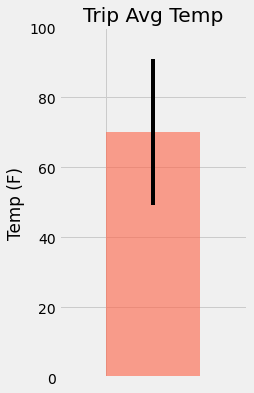

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = [df['max']- df['min']]
df.plot(kind='bar', y='avg', yerr=error, color='tomato', alpha=0.6,legend = '',
        figsize=(3,6), title='Trip Avg Temp',align='edge')
plt.ylim(0,100)
plt.ylabel("Temp (F)")
plt.tick_params(axis='x', which='both', labelbottom=False)
plt.show()

### Daily Rainfall Average

In [51]:
# Calculate the total amount of rainfall per weather station for your trip dates
# using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list 
# the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name,Station.latitude,Station.longitude, Station.elevation,func.sum(Measurement.tobs)]
rainfall_station = session.query(*sel).group_by(Measurement.station).\
                    outerjoin(Station, Measurement.station==Station.station).\
                    filter(Measurement.date >= '2015-02-01').\
                    filter(Measurement.date <= '2015-02-14').\
                    order_by(func.sum(Measurement.tobs).desc()).all()
rainfall_station

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 982.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 974.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  947.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  908.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 753.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  740.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  713.0),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  713.0)]

In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [106]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_trip = '2015-02-01'
end_trip = '2015-02-14'

# Use the start and end date to create a range of dates
range_date = pd.date_range(start_trip , end_trip).strftime('%Y-%m-%d')

# Stip off the year and save a list of %m-%d strings
range_date_new = pd.date_range(start_trip , end_trip).strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normal_list = []

for date in range_date_new:
    normal = daily_normals(date)
    normal_list.append(normal)
    
print(normal_list)

[[(56.0, 68.14035087719299, 78.0)], [(59.0, 68.85964912280701, 77.0)], [(58.0, 67.79661016949153, 77.0)], [(61.0, 68.14035087719299, 76.0)], [(59.0, 69.6842105263158, 80.0)], [(58.0, 70.38983050847457, 77.0)], [(60.0, 69.0, 77.0)], [(56.0, 66.75438596491227, 74.0)], [(57.0, 67.58928571428571, 75.0)], [(56.0, 68.41666666666667, 76.0)], [(61.0, 69.25, 79.0)], [(60.0, 69.15789473684211, 78.0)], [(58.0, 70.36206896551724, 80.0)], [(62.0, 70.89473684210526, 79.0)]]


In [107]:
# Load the previous query results into a Pandas DataFrame and 
# add the `trip_dates` range as the `date` index
new_normal_list = [x for x in chain.from_iterable(normal_list)]
df = DataFrame(new_normal_list, columns = ['tmin','tavg','tmax'],index=[range_date])
df

,tmin,tavg,tmax
2015-02-01,56.0,68.140351,78.0
2015-02-02,59.0,68.859649,77.0
2015-02-03,58.0,67.796610,77.0
2015-02-04,61.0,68.140351,76.0
2015-02-05,59.0,69.684211,80.0
2015-02-06,58.0,70.389831,77.0
2015-02-07,60.0,69.000000,77.0
2015-02-08,56.0,66.754386,74.0
2015-02-09,57.0,67.589286,75.0
2015-02-10,56.0,68.416667,76.0


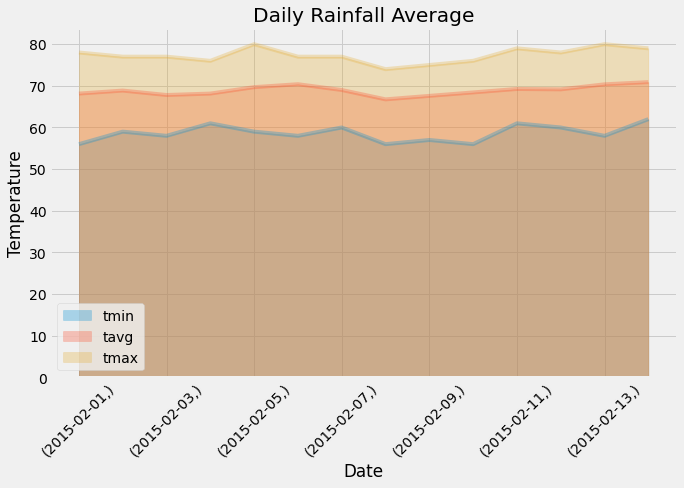

In [108]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind="area", stacked=False, alpha=.3,figsize=(10,6))
plt.title("Daily Rainfall Average")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()